In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Paths
# MODEL_PATH = 'models/classificationModelGpu50327.keras'  # Path to the saved model
MODEL_PATH = 'models_15cat/vgg16_best_model.keras'  # Path to the saved model
IMG_HEIGHT = 224
IMG_WIDTH = 224
# CLASS_NAMES = ['seat', 'window','food','unhyg_comp', 'unhyg_toilet', 'unhyg_washroom', 'violenve']  # Update with actual class names
CLASS_NAMES = ['bags','bedroll','chg','seat', 'window','door', 'fan','food', 'medical','packaged food','unhyg_comp', 'unhyg_toilet', 'unhyg_washroom', 'violenve', 'win_img']  # Update with actual class names

# Step 1: Load the saved model
def load_model():
    # Load the trained model
    model = tf.keras.models.load_model(MODEL_PATH)
    return model

# Step 2: Preprocess the custom image for prediction
def preprocess_image(img_path):
    # Load the image with the target size
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image
    img_array = img_array / 255.0
    return img_array

# Step 3: Predict the class of the image
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_class_name = CLASS_NAMES[predicted_class[0]]
    return predicted_class_name, predictions

# Step 4: Display the image and the prediction
def display_prediction(img_path, predicted_class_name, predictions):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class_name} (Confidence: {np.max(predictions):.2f})')
    plt.axis('off')
    plt.show()



# Main function to make a prediction on a custom image
def main(img_path):
    # Load the model
    model = load_model()

    ''' TODO: if video: frame by frame logic
                thread - paraller processing - server resource Upscale
                Audio detach & processing
    '''

    # Predict the class of the image
    predicted_class_name, predictions = predict_image(model, img_path)

    # Display the image and the prediction
    display_prediction(img_path, predicted_class_name, predictions)

    print(f"Predicted Class: {predicted_class_name}")
   

   



1/1 [==============================] - 13s 13s/step


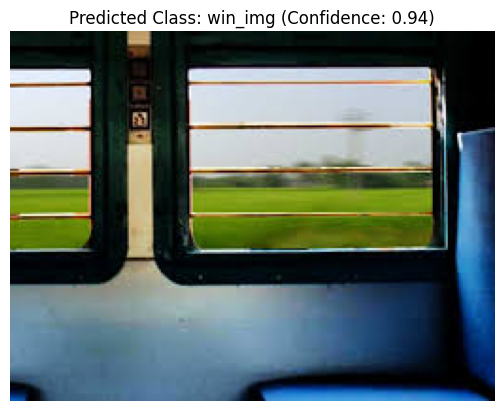

Predicted Class: win_img


INFO:tensorflow:Assets written to: models_15cat/VGG19_saved_model\assets


INFO:tensorflow:Assets written to: models_15cat/VGG19_saved_model\assets


Model saved to models_15cat/VGG19_saved_model
TFLite model saved to models_15cat/VGG19_model.tflite


In [6]:
if __name__ == '__main__':
    img_path = 'imageCategoryData/val_data/test_win_img/download (4).jpeg'  # Replace with the actual path to your image
    # img_path = 'image.png'  # Replace with the actual path to your image
    main(img_path)